In [3]:
import pandas as pd
import numpy as np
from math import log

![alt text](cars.png "Column's description")

Consegna:
del dataset cars voglio prevedere il prezzo in funzione delle altre variabili presenti.
Analizza il dataset e, dopo averlo opportunamente pulito, trova quante più correlazioni rispetto alla variabile prezzo.
Utilizza le tecniche studiate in statistica descrittiva e se possibile costruisci opportunamente dei grafici per mostrare le correlazioni trovate.

In [4]:
def b(covarianza = float, varianzax = float):
    b = covarianza / varianzax
    return b

def a(mediay = float, b = float, mediax = float):
    a = mediay - (b*mediax)
    return a

In [5]:
cars = "C:/Users/lucam/OneDrive/Desktop/car_prices.csv"

In [6]:
db_cars = pd.read_csv(cars, keep_default_na=False, na_values="")
db_cars

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [7]:
db_cars2 = db_cars.copy()
db_cars2

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [8]:
db_cars2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [9]:
db_cars2["vin"].value_counts(dropna=False)

automatic            22
wbanv13588cz57827     5
wp0ca2988xu629622     4
1ftfw1cv5afb30053     4
NaN                   4
                     ..
5n1ed28y1yc550927     1
1p3ew65g7yv603989     1
4t1bf28b1yu016829     1
jtdbt1231y0082703     1
1ftfw1et2eke87277     1
Name: vin, Length: 550298, dtype: int64

In [10]:
db_cars2["vin"].isnull().value_counts()

False    558833
True          4
Name: vin, dtype: int64

In [11]:
db_cars2["flag_nul"] = db_cars2["vin"].isnull() 

In [12]:
db_null = db_cars2.loc[db_cars2["flag_nul"],:]
db_null


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,flag_nul
461612,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,NaN,3vwd17aj3fm259017,NaN,46.0,2711,white,black,NaN,14250.0,14000,True
505299,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,NaN,3vwd17aj7fm222388,NaN,36.0,20379,silver,black,NaN,13600.0,13500,True
529009,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,NaN,3vwd17aj8fm298895,NaN,2.0,2817,red,black,NaN,13750.0,12200,True
551222,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,NaN,3vwd17aj8fm239622,NaN,2.0,9562,silver,black,NaN,13200.0,12100,True


In [13]:
db_cars2.at[461612, "vin"] = "3vwd17aj3fm259017"	#si poteva fare un CONCUT
db_cars2.at[461612, "state"] = np.nan
db_cars2.at[461612, "condition"] = 46
db_cars2.at[461612, "odometer"] = 2711
db_cars2.at[461612, "color"] = "white"
db_cars2.at[461612, "interior"] = "black" 
db_cars2.at[461612, "mmr"] =  14250.0
db_cars2.at[461612, "sellingprice"] = 14000
db_cars2.at[461612, "saledate"] = np.nan
db_cars2.at[461612, "seller"] = np.nan

db_cars2.at[505299, "vin"] = "3vwd17aj7fm222388"	
db_cars2.at[505299, "state"] = np.nan
db_cars2.at[505299, "condition"] = 36
db_cars2.at[505299, "odometer"] = 20379
db_cars2.at[505299, "color"] = "silver"
db_cars2.at[505299, "interior"] = "black" 
db_cars2.at[505299, "mmr"] =  13600.0
db_cars2.at[505299, "sellingprice"] = 13500
db_cars2.at[505299, "saledate"] = np.nan
db_cars2.at[505299, "seller"] = np.nan

db_cars2.at[529009, "vin"] = "3vwd17aj8fm298895"	
db_cars2.at[529009, "state"] = np.nan
db_cars2.at[529009, "condition"] = 2
db_cars2.at[529009, "odometer"] = 2817
db_cars2.at[529009, "color"] = "red"
db_cars2.at[529009, "interior"] = "black" 
db_cars2.at[529009, "mmr"] =  13750.0
db_cars2.at[529009, "sellingprice"] = 12200
db_cars2.at[529009, "saledate"] = np.nan
db_cars2.at[529009, "seller"] = np.nan

db_cars2.at[551222, "vin"] = "3vwd17aj8fm239622"	
db_cars2.at[551222, "state"] = np.nan
db_cars2.at[551222, "condition"] = 2
db_cars2.at[551222, "odometer"] = 9562
db_cars2.at[551222, "color"] = "silver"
db_cars2.at[551222, "interior"] = "black" 
db_cars2.at[551222, "mmr"] =  13200.0
db_cars2.at[551222, "sellingprice"] = 12100
db_cars2.at[551222, "saledate"] = np.nan
db_cars2.at[551222, "seller"] = np.nan

In [14]:
db_cars.iloc[551222]

year                              2015
make                        Volkswagen
model                            Jetta
trim            SE PZEV w/Connectivity
body                       Navitgation
transmission                     sedan
vin                                NaN
state                3vwd17aj8fm239622
condition                          NaN
odometer                           2.0
color                             9562
interior                        silver
seller                           black
mmr                                NaN
sellingprice                   13200.0
saledate                         12100
Name: 551222, dtype: object

In [15]:
db_cars2["flag_nul"] = db_cars2["vin"].isnull() 
db_cars2["vin"].isnull().value_counts()

False    558837
Name: vin, dtype: int64

In [16]:
db_null2 = db_cars2.loc[db_cars2["flag_nul"],:]
db_null2

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,flag_nul


In [17]:
db_cars2["flag_duplicate_row"] = db_cars2.duplicated()
db_cars2["flag_duplicate_row"].value_counts()

False    558837
Name: flag_duplicate_row, dtype: int64

In [18]:
db_cars2["vin"][554710]

'automatic'

In [19]:
db_cars2[db_cars2["vin"] == "automatic"].shape #sarebbe stato meglio questo

(22, 18)

In [20]:
errori = []
for i in db_cars2["vin"]:
    if len(i) < 17:
        errori.append(i)
errori

['automatic',
 'automatic',
 'automatic',
 'automatic',
 'automatic',
 'automatic',
 'automatic',
 'automatic',
 'automatic',
 'automatic',
 'automatic',
 'automatic',
 'automatic',
 'automatic',
 'automatic',
 'automatic',
 'automatic',
 'automatic',
 'automatic',
 'automatic',
 'automatic',
 'automatic']

In [21]:
db_cars2.loc[554710]

year                                    2015
make                              Volkswagen
model                                  Jetta
trim                  SE PZEV w/Connectivity
body                             Navitgation
transmission                           sedan
vin                                automatic
state                      3vwd17aj2fm261566
condition                                NaN
odometer                                48.0
color                                   5001
interior                                blue
seller                                  gray
mmr                                      NaN
sellingprice                         13400.0
saledate                               13600
flag_nul                               False
flag_duplicate_row                     False
Name: 554710, dtype: object

In [22]:
counter = 0 #anqche qua vale come quello sopra
for i in db_cars2["vin"]:
    if len(i) < 17:
        db_cars2["vin"][counter] = db_cars2["state"].copy()[counter]
        db_cars2["state"][counter] = np.nan
        db_cars2["condition"][counter] = db_cars2["odometer"].copy()[counter]
        db_cars2["odometer"][counter] = db_cars2["color"].copy()[counter]
        db_cars2["color"][counter] = db_cars2["interior"].copy()[counter]
        db_cars2["interior"][counter] = db_cars2["seller"].copy()[counter]
        db_cars2["seller"][counter] = np.nan
        db_cars2["mmr"][counter] = db_cars2["sellingprice"].copy()[counter]
        db_cars2["sellingprice"][counter] = db_cars2["saledate"].copy()[counter]
        db_cars2["saledate"][counter] = "           2015"
    counter += 1

C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\2073157511.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_cars2["vin"][counter] = db_cars2["state"].copy()[counter]
C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\2073157511.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_cars2["state"][counter] = np.nan
C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\2073157511.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_

In [23]:
db_cars2["vin"][554710]

'3vwd17aj2fm261566'

In [24]:
db_cars2.loc[554710]

year                                    2015
make                              Volkswagen
model                                  Jetta
trim                  SE PZEV w/Connectivity
body                             Navitgation
transmission                           sedan
vin                        3vwd17aj2fm261566
state                                    NaN
condition                               48.0
odometer                                5001
color                                   blue
interior                                gray
seller                                   NaN
mmr                                  13400.0
sellingprice                           13600
saledate                                2015
flag_nul                               False
flag_duplicate_row                     False
Name: 554710, dtype: object

In [25]:
errori = []
for i in db_cars2["vin"]:
    if len(i) < 17:
        errori.append(i)
errori

[]

In [26]:
db_cars2["flag_duplicate_vin"] = db_cars2["vin"].duplicated(keep=False)
db_cars2["flag_duplicate_vin"].value_counts()

False    541996
True      16841
Name: flag_duplicate_vin, dtype: int64

In [27]:
db_cars2.loc[db_cars2["flag_duplicate_vin"],:]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,flag_nul,flag_duplicate_row,flag_duplicate_vin
21,2014,BMW,5 Series,528i,Sedan,automatic,wba5a5c51ed501631,ca,29.0,25969.0,black,black,financial services remarketing (lease),34200.0,30000.0,Tue Feb 03 2015 04:30:00 GMT-0800 (PST),False,False,True
70,2014,Audi,A8,L 3.0T quattro,Sedan,automatic,waurgafd8en003111,ca,43.0,32918.0,black,black,audi west covina,62000.0,50000.0,Tue Dec 30 2014 12:30:00 GMT-0800 (PST),False,False,True
382,2013,Kia,Soul,Base,Wagon,manual,kndjt2a54d7539154,ca,1.0,11699.0,silver,black,kia motors finance,11400.0,6900.0,Tue Dec 16 2014 12:00:00 GMT-0800 (PST),False,False,True
394,2013,Nissan,Altima,2.5 S,Coupe,automatic,1n4al2ep0dc231309,ca,1.0,33985.0,black,black,remarketing by ge/manheim southern california,13700.0,8000.0,Tue Dec 23 2014 13:00:00 GMT-0800 (PST),False,False,True
432,2013,Kia,Rio,LX,Sedan,automatic,knadm4a3xd6113380,ca,2.0,45800.0,black,beige,kia motors finance,8550.0,3850.0,Tue Jan 13 2015 13:00:00 GMT-0800 (PST),False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558737,2009,Jeep,Wrangler,Unlimited Rubicon,suv,automatic,1j4ga69109l752295,nv,37.0,70423.0,white,black,millennium cars,23100.0,17500.0,Fri Jun 19 2015 05:00:00 GMT-0700 (PDT),False,False,True
558738,2008,Ford,F-250 Super Duty,Lariat,crew cab,automatic,1ftsw21rx8ea22277,nv,33.0,125628.0,black,beige,bul connections llc,21000.0,18700.0,Fri Jun 19 2015 04:45:00 GMT-0700 (PDT),False,False,True
558750,2007,Saturn,Aura,XE,sedan,automatic,1g8zs57n17f246542,ga,29.0,82083.0,—,beige,carworks inc,5450.0,5200.0,Tue Jun 23 2015 06:00:00 GMT-0700 (PDT),False,False,True
558800,2012,Kia,Soul,Base,Wagon,manual,kndjt2a57c7424577,nv,28.0,53607.0,silver,black,unique autos,7825.0,8000.0,Fri Jul 03 2015 09:00:00 GMT-0700 (PDT),False,False,True


In [28]:
db_cars2["chiave_univoca"] = db_cars2["vin"] + "." + db_cars2["saledate"] #sarebbe stato meglio separato da un "_"

In [29]:
db_cars2["flag_duplicati_chiave_univoca"] = db_cars2["chiave_univoca"].duplicated(keep=False)

In [30]:
db_duplicati = db_cars2.loc[db_cars2["flag_duplicati_chiave_univoca"],:]
db_duplicati

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,interior,seller,mmr,sellingprice,saledate,flag_nul,flag_duplicate_row,flag_duplicate_vin,chiave_univoca,flag_duplicati_chiave_univoca
1723,2012,Mercedes-Benz,M-Class,ML63 AMG,SUV,NaN,4jgda7eb0ca049551,ca,NaN,1.0,...,NaN,high bid trading co inc,69000.0,18500.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),False,False,True,4jgda7eb0ca049551.Thu Dec 18 2014 12:00:00 GMT...,True
3744,2006,Chrysler,300,C,Sedan,automatic,2c3la63h26h278454,ca,41.0,115397.0,...,gray,high bid trading co inc,6250.0,8300.0,Wed Dec 31 2014 12:15:00 GMT-0800 (PST),False,False,True,2c3la63h26h278454.Wed Dec 31 2014 12:15:00 GMT...,True
4158,2005,Chevrolet,Equinox,LS,SUV,NaN,2cndl13f056137366,ca,NaN,NaN,...,NaN,buena park honda,3250.0,27500.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),False,False,True,2cndl13f056137366.Thu Dec 18 2014 12:00:00 GMT...,True
4685,2003,BMW,7 Series,745Li,Sedan,NaN,wbagn63403ds43612,ca,NaN,NaN,...,NaN,prestige auto wholesale inc,4900.0,3700.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),False,False,True,wbagn63403ds43612.Thu Dec 18 2014 12:00:00 GMT...,True
7231,2005,Chevrolet,Equinox,LS,SUV,automatic,2cndl13f056137366,ca,NaN,125141.0,...,—,buena park honda,3550.0,3300.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),False,False,True,2cndl13f056137366.Thu Dec 18 2014 12:00:00 GMT...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551488,2003,Cadillac,Seville,STS,sedan,automatic,1g6ky54973u197868,oh,21.0,135318.0,...,beige,aex credit services,1525.0,1050.0,Thu Jun 18 2015 02:00:00 GMT-0700 (PDT),False,False,True,1g6ky54973u197868.Thu Jun 18 2015 02:00:00 GMT...,True
554397,2009,Audi,A4,2.0T Premium Avant quattro,wagon,NaN,waugf78k99a184578,pa,4.0,32988.0,...,gray,r hollenshead auto sales inc,19400.0,19400.0,Fri Jun 19 2015 02:00:00 GMT-0700 (PDT),False,False,True,waugf78k99a184578.Fri Jun 19 2015 02:00:00 GMT...,True
557265,2003,Cadillac,Seville,STS,sedan,automatic,1g6ky54973u197868,oh,21.0,135321.0,...,beige,aex credit services,1325.0,700.0,Thu Jun 18 2015 02:00:00 GMT-0700 (PDT),False,False,True,1g6ky54973u197868.Thu Jun 18 2015 02:00:00 GMT...,True
557657,2009,Audi,A4,2.0T Premium Avant quattro,wagon,NaN,waugf78k99a184578,pa,42.0,33360.0,...,gray,r hollenshead auto sales inc,18950.0,19900.0,Fri Jun 19 2015 02:00:00 GMT-0700 (PDT),False,False,True,waugf78k99a184578.Fri Jun 19 2015 02:00:00 GMT...,True


In [31]:
db_no_dupli = db_cars2.drop_duplicates(subset=["chiave_univoca"]) #unire chiave univoca con index 
db_no_dupli

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,interior,seller,mmr,sellingprice,saledate,flag_nul,flag_duplicate_row,flag_duplicate_vin,chiave_univoca,flag_duplicati_chiave_univoca
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,...,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),False,False,False,5xyktca69fg566472.Tue Dec 16 2014 12:30:00 GMT...,False
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,...,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),False,False,False,5xyktca69fg561319.Tue Dec 16 2014 12:30:00 GMT...,False
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,...,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),False,False,False,wba3c1c51ek116351.Thu Jan 15 2015 04:30:00 GMT...,False
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,...,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),False,False,False,yv1612tb4f1310987.Thu Jan 29 2015 04:30:00 GMT...,False
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,...,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),False,False,False,wba6b2c57ed129731.Thu Dec 18 2014 12:30:00 GMT...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,...,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT),False,False,False,knalw4d4xf6019304.Thu Jul 09 2015 07:00:00 GMT...,False
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,...,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),False,False,False,3c6td5et6cg112407.Wed Jul 08 2015 09:30:00 GMT...,False
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,...,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),False,False,False,5uxzw0c58cl668465.Wed Jul 08 2015 09:30:00 GMT...,False
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,...,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),False,False,False,1n4al3ap0fc216050.Thu Jul 09 2015 06:45:00 GMT...,False


---

# luca è un pollo

### luca è un pollo


---

---

In [32]:
db_no_dupli2 = db_no_dupli[["odometer","sellingprice","mmr","condition"]]

In [33]:
db_no_dupli2[["odometer","mmr"]].cov()

C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\3877738680.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  db_no_dupli2[["odometer","mmr"]].cov()


,mmr
mmr,9.369448e+07


In [34]:
db_no_dupli2

,odometer,sellingprice,mmr,condition
0,16639.0,21500.0,20500.0,5.0
1,9393.0,21500.0,20800.0,5.0
2,1331.0,30000.0,31900.0,45.0
3,14282.0,27750.0,27500.0,41.0
4,2641.0,67000.0,66000.0,43.0
...,...,...,...,...
558832,18255.0,33000.0,35300.0,45.0
558833,54393.0,30800.0,30200.0,5.0
558834,50561.0,34000.0,29800.0,48.0
558835,16658.0,11100.0,15100.0,38.0


In [35]:
db_no_dupli2["sellingprice"]= db_no_dupli2["sellingprice"].astype(float) #NON era da togliere l'outlier
db_no_dupli2["sellingprice"].max()
db_no_dupli2[db_no_dupli2["sellingprice"] == 230000]
#noto che è presente un errore, questo errore crea un outlier

C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\1779813959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_no_dupli2["sellingprice"]= db_no_dupli2["sellingprice"].astype(float) #NON era da togliere l'outlier


,odometer,sellingprice,mmr,condition
344905,27802.0,230000.0,22800.0,43.0


In [36]:
db_no_dupli2.at[344905, "sellingprice"] = 23000
db_no_dupli2.at[344905, "sellingprice"]

23000.0

In [37]:
db_no_dupli2.shape

(558735, 4)

In [38]:
db_no_dupli2["sellingprice"].isnull().value_counts()
db_no_dupli2["flag_price_null"] = db_no_dupli2["sellingprice"].isnull()
db_no_dupli2.loc[db_no_dupli2["flag_price_null"],:]

C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\3911527942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_no_dupli2["flag_price_null"] = db_no_dupli2["sellingprice"].isnull()


,odometer,sellingprice,mmr,condition,flag_price_null
306447,37254.0,NaN,NaN,19.0,True


In [39]:
#--------------------------------------------------------------------------

In [40]:
covar_sellingprice_condition = db_no_dupli2[["sellingprice","condition"]]
covar_sellingprice_condition.dropna()
covar_sellingprice_condition

,sellingprice,condition
0,21500.0,5.0
1,21500.0,5.0
2,30000.0,45.0
3,27750.0,41.0
4,67000.0,43.0
...,...,...
558832,33000.0,45.0
558833,30800.0,5.0
558834,34000.0,48.0
558835,11100.0,38.0


In [41]:
covar_sellingprice_condition["sellingprice"]=covar_sellingprice_condition["sellingprice"].astype(float)

C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\278884811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covar_sellingprice_condition["sellingprice"]=covar_sellingprice_condition["sellingprice"].astype(float)


In [42]:
media_sellingprice = covar_sellingprice_condition["sellingprice"].mean()
media_condizione = covar_sellingprice_condition["condition"].mean()

In [43]:
# mmr - selling price = dato utile per capire quanto una machcchina è stata venduto a piu o meno dal prezzo iniziale

In [44]:
covar_sellingprice_condition.corr()

,sellingprice,condition
sellingprice,1.000000,0.321972
condition,0.321972,1.000000


In [45]:
covar_sellingprice_condition.cov()

,sellingprice,condition
sellingprice,9.496584e+07,42043.903805
condition,4.204390e+04,179.627972


In [46]:
#PROVO A FARE UN MODELLO TRA SELLINGPRICE E CONDITION

In [47]:

import matplotlib.pyplot as plt

In [48]:
corr_sellingprice_cond = 	4.204857e+04 / (covar_sellingprice_condition["sellingprice"].std() * covar_sellingprice_condition["condition"].std())
corr_sellingprice_cond

0.32194415988209757

In [49]:
b1 = 4.204857e+04 / covar_sellingprice_condition["condition"].var()
b1

234.08698266782415

# per il modello utilizza un pacchetto scipy

In [50]:
covar_sellingprice_condition["sellingprice"] = covar_sellingprice_condition["sellingprice"].astype(float)
a1= covar_sellingprice_condition["sellingprice"].mean() - covar_sellingprice_condition["condition"].mean() * b1
a1

C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\2882187866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covar_sellingprice_condition["sellingprice"] = covar_sellingprice_condition["sellingprice"].astype(float)


6431.468238181933

In [51]:
covar_sellingprice_condition["prezzo_predetto"] = a1 + b1 * covar_sellingprice_condition["condition"]

C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\42265105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covar_sellingprice_condition["prezzo_predetto"] = a1 + b1 * covar_sellingprice_condition["condition"]


In [52]:
covar_sellingprice_condition

,sellingprice,condition,prezzo_predetto
0,21500.0,5.0,7601.903152
1,21500.0,5.0,7601.903152
2,30000.0,45.0,16965.382458
3,27750.0,41.0,16029.034528
4,67000.0,43.0,16497.208493
...,...,...,...
558832,33000.0,45.0,16965.382458
558833,30800.0,5.0,7601.903152
558834,34000.0,48.0,17667.643406
558835,11100.0,38.0,15326.773580


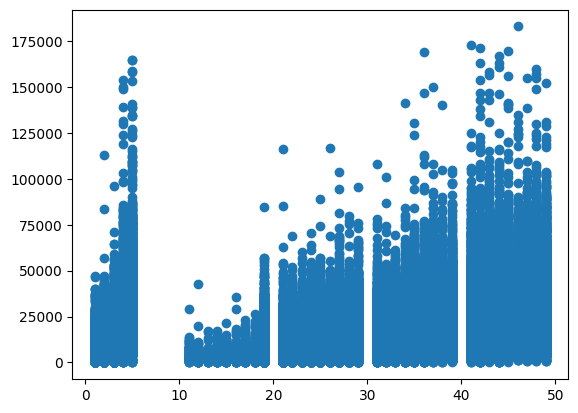

In [53]:
plt.scatter(covar_sellingprice_condition["condition"],covar_sellingprice_condition["sellingprice"]) #trasformare conditioni n variabile categorica
plt.show() # lavorare sui due nercati predominanti

Text(0, 0.5, 'prezzo di vendita')

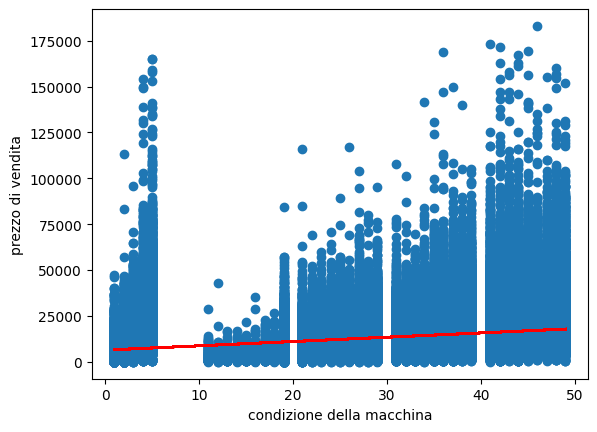

In [54]:
plt.scatter(covar_sellingprice_condition["condition"],covar_sellingprice_condition["sellingprice"])
plt.plot(covar_sellingprice_condition["condition"],covar_sellingprice_condition["prezzo_predetto"], color = "red", label ="modello lineare")
plt.xlabel('condizione della macchina')
plt.ylabel('prezzo di vendita')

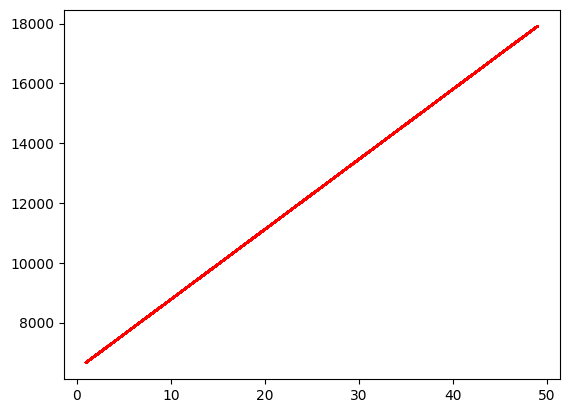

In [55]:
plt.plot(covar_sellingprice_condition["condition"],covar_sellingprice_condition["prezzo_predetto"], color = "red", label ="modello lineare")
plt.show()

In [56]:
coeff_determinazione = (corr_sellingprice_cond ** 2) * 100
coeff_determinazione
#IL MODELLO HA UNA VALIDITà DEL 10%

10.36480420821896

In [57]:
#--------------------------------------------------------------------------------------------------

In [58]:
#calcolo del modello tra sellingprice e odometro
sellingprice_odeometer = db_no_dupli2[["sellingprice","odometer"]]
sellingprice_odeometer

,sellingprice,odometer
0,21500.0,16639.0
1,21500.0,9393.0
2,30000.0,1331.0
3,27750.0,14282.0
4,67000.0,2641.0
...,...,...
558832,33000.0,18255.0
558833,30800.0,54393.0
558834,34000.0,50561.0
558835,11100.0,16658.0


In [59]:
sellingprice_odeometer["sellingprice"]=sellingprice_odeometer["sellingprice"].astype(float)
sellingprice_odeometer["odometer"]=sellingprice_odeometer["odometer"].astype(float)
sellingprice_odeometer.info()
sellingprice_odeometer = sellingprice_odeometer.dropna()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 558735 entries, 0 to 558836
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   sellingprice  558734 non-null  float64
 1   odometer      558642 non-null  float64
dtypes: float64(2)
memory usage: 28.9 MB


C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\3406633450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sellingprice_odeometer["sellingprice"]=sellingprice_odeometer["sellingprice"].astype(float)
C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\3406633450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sellingprice_odeometer["odometer"]=sellingprice_odeometer["odometer"].astype(float)


In [60]:
sellingprice_odeometer.cov()

,sellingprice,odometer
sellingprice,9.495914e+07,-3.031307e+08
odometer,-3.031307e+08,2.850742e+09


In [61]:
sellingprice_odeometer.corr()

,sellingprice,odometer
sellingprice,1.000000,-0.582616
odometer,-0.582616,1.000000


In [62]:
sellingprice_odeometer["odometer"] = sellingprice_odeometer["odometer"].astype(float)
b12 = b(-3.031307e+08,sellingprice_odeometer["odometer"].var())
a1 = a(sellingprice_odeometer["sellingprice"].mean(),b12,sellingprice_odeometer["odometer"].mean() )

sellingprice_odeometer["prezzo_predetto"] = a1 + (b12 * sellingprice_odeometer["odometer"])
sellingprice_odeometer

C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\545882700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sellingprice_odeometer["odometer"] = sellingprice_odeometer["odometer"].astype(float)
C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\545882700.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sellingprice_odeometer["prezzo_predetto"] = a1 + (b12 * sellingprice_odeometer["odometer"])


,sellingprice,odometer,prezzo_predetto
0,21500.0,16639.0,19108.221363
1,21500.0,9393.0,19878.717338
2,30000.0,1331.0,20735.981835
3,27750.0,14282.0,19358.850539
4,67000.0,2641.0,20596.684330
...,...,...,...
558832,33000.0,18255.0,18936.385661
558833,30800.0,54393.0,15093.688511
558834,34000.0,50561.0,15501.160299
558835,11100.0,16658.0,19106.201017


In [63]:
sellingprice_odeometer["scarti_valore_noto"] = sellingprice_odeometer["sellingprice"] - sellingprice_odeometer["prezzo_predetto"]
sellingprice_odeometer["scarti_valore_noto"].sum()

C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\2946832135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sellingprice_odeometer["scarti_valore_noto"] = sellingprice_odeometer["sellingprice"] - sellingprice_odeometer["prezzo_predetto"]


-5.066394805908203e-07

In [64]:


coeff_determinazione = ((-0.582389)**2)*100
coeff_determinazione
#IL MODELLO HA UNA VALIDITà DEL 33%
sellingprice_odeometer["prezzo_predetto"].min()

-85456.35522753662

183000.0

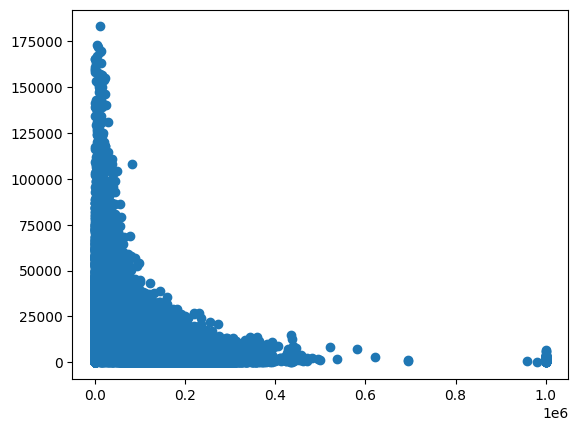

In [65]:
plt.plot(sellingprice_odeometer["odometer"], sellingprice_odeometer["sellingprice"],"o")
sellingprice_odeometer["sellingprice"].max()

In [66]:
# sellingprice_odeometer["l_odometro"] = sellingprice_odeometer["l_odometro"].astype(float)

sellingprice_odeometer["l_odometro"] = np.log(sellingprice_odeometer["odometer"].values)
sellingprice_odeometer["l_sellingprice"] = np.log(sellingprice_odeometer["sellingprice"].values)

C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\796293028.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sellingprice_odeometer["l_odometro"] = np.log(sellingprice_odeometer["odometer"].values)
C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\796293028.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sellingprice_odeometer["l_sellingprice"] = np.log(sellingprice_odeometer["sellingprice"].values)


<Axes: >

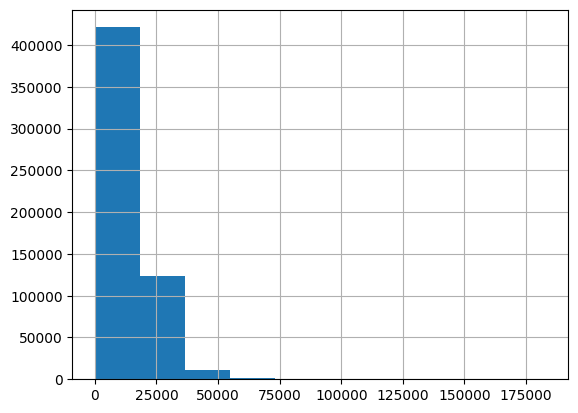

In [67]:
sellingprice_odeometer["sellingprice"].hist()

<Axes: >

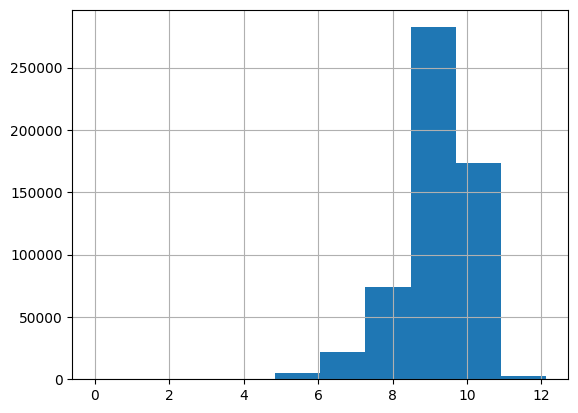

In [68]:
sellingprice_odeometer["l_sellingprice"].hist()

In [69]:
sellingprice_odeometer["l2_odometro"] = sellingprice_odeometer["l_odometro"]**2

C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\926462437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sellingprice_odeometer["l2_odometro"] = sellingprice_odeometer["l_odometro"]**2


In [70]:
b2 = sellingprice_odeometer[["l2_odometro","l_sellingprice"]].cov().reset_index().loc[0,"l_sellingprice"] / sellingprice_odeometer["l2_odometro"].var()

In [71]:
a2 = a(sellingprice_odeometer["l_sellingprice"].mean(), b2,sellingprice_odeometer["l2_odometro"].mean() )

In [72]:
a2

12.51637463415603

In [73]:
b2

-0.028229082324797077

In [74]:
sellingprice_odeometer["prezzi_predetti2"] = a2 + b2*sellingprice_odeometer["l2_odometro"]

C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\336182188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sellingprice_odeometer["prezzi_predetti2"] = a2 + b2*sellingprice_odeometer["l2_odometro"]


Text(0, 0.5, 'sellingprice')

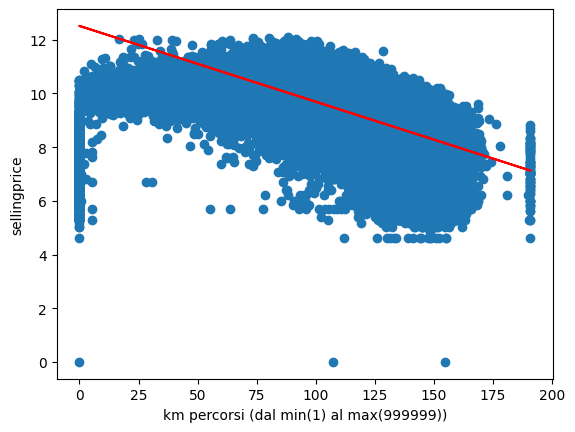

In [75]:
plt.plot(sellingprice_odeometer["l2_odometro"], sellingprice_odeometer["l_sellingprice"],"o")
plt.plot(sellingprice_odeometer["l2_odometro"], sellingprice_odeometer["prezzi_predetti2"], color ="red")
#plt.plot(sellingprice_odeometer["l_odometer"], sellingprice_odeometer["prezzo_predetto"], color ="red", label = "regressione lineare")
plt.xlabel('km percorsi (dal min(1) al max(999999))')
plt.ylabel('sellingprice')

Text(0, 0.5, 'sellingprice')

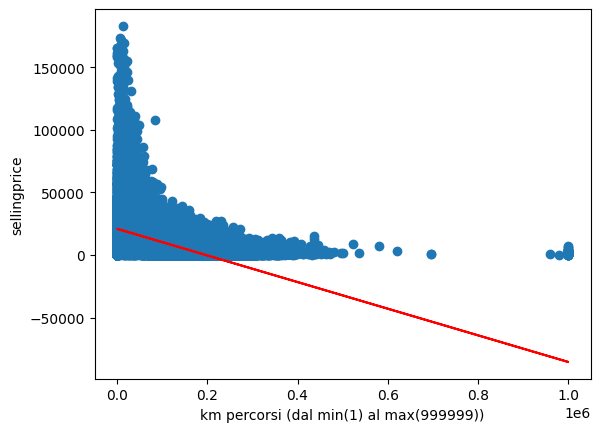

In [76]:
plt.plot(sellingprice_odeometer["odometer"], sellingprice_odeometer["sellingprice"],"o")
plt.plot(sellingprice_odeometer["odometer"], sellingprice_odeometer["prezzo_predetto"], color ="red", label = "regressione lineare")
plt.xlabel('km percorsi (dal min(1) al max(999999))')
plt.ylabel('sellingprice')

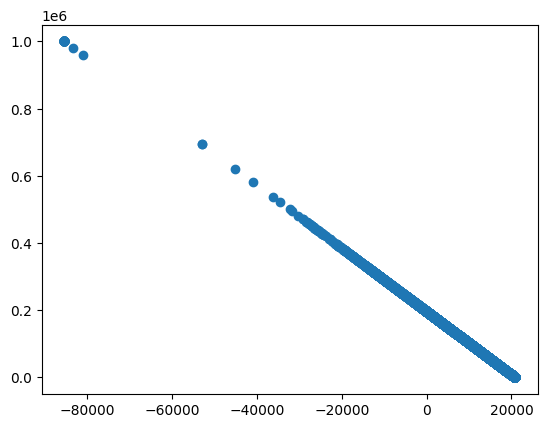

In [77]:
plt.plot(sellingprice_odeometer["prezzo_predetto"], sellingprice_odeometer["odometer"],"o")


In [78]:
db_no_dupli2["sellingprice"] = db_no_dupli2["sellingprice"].astype(float)
db_no_dupli2["mmr"] = db_no_dupli2["mmr"].astype(float)

db_no_dupli2["profitto_vendita"] = db_no_dupli2["sellingprice"] - db_no_dupli2["mmr"]
db_no_dupli2
#così facendo trovo a quanto la macchina è stata venduta a più o meno rispetto al prezzo di listino

C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\4285469395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_no_dupli2["sellingprice"] = db_no_dupli2["sellingprice"].astype(float)
C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\4285469395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_no_dupli2["mmr"] = db_no_dupli2["mmr"].astype(float)
C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\4285469395.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,odometer,sellingprice,mmr,condition,flag_price_null,profitto_vendita
0,16639.0,21500.0,20500.0,5.0,False,1000.0
1,9393.0,21500.0,20800.0,5.0,False,700.0
2,1331.0,30000.0,31900.0,45.0,False,-1900.0
3,14282.0,27750.0,27500.0,41.0,False,250.0
4,2641.0,67000.0,66000.0,43.0,False,1000.0
...,...,...,...,...,...,...
558832,18255.0,33000.0,35300.0,45.0,False,-2300.0
558833,54393.0,30800.0,30200.0,5.0,False,600.0
558834,50561.0,34000.0,29800.0,48.0,False,4200.0
558835,16658.0,11100.0,15100.0,38.0,False,-4000.0


In [79]:
#--------------------------------------------------------------------------------------------------------

In [80]:
#calcolo quanto sono correlati i km della machhina con il guadagno sulla vendita
guadagno_odometer= db_no_dupli2[["profitto_vendita","odometer"]]
guadagno_odometer["odometer"] = guadagno_odometer["odometer"].astype(float)
guadagno_odometer = guadagno_odometer.dropna()
guadagno_odometer

C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\155425976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guadagno_odometer["odometer"] = guadagno_odometer["odometer"].astype(float)


,profitto_vendita,odometer
0,1000.0,16639.0
1,700.0,9393.0
2,-1900.0,1331.0
3,250.0,14282.0
4,1000.0,2641.0
...,...,...
558832,-2300.0,18255.0
558833,600.0,54393.0
558834,4200.0,50561.0
558835,-4000.0,16658.0


In [81]:
guadagno_odometer.corr()

,profitto_vendita,odometer
profitto_vendita,1.000000,0.008541
odometer,0.008541,1.000000


In [82]:
guadagno_odometer.cov()

,profitto_vendita,odometer
profitto_vendita,3.014128e+06,7.917395e+05
odometer,7.917395e+05,2.850742e+09


In [83]:
#SAREBBE GIUSTO ANCHE VEDERE QUALI SONO LE MACCHINE PIU COSTOSE, ES: FORD LAMBO ETC  <-----------------------------------------------
#UN'ALTRA IDEA SIMPATICA SAREBBE VEDERE ANCHE PER COLORE, TANTO SE LO FAI PER QUELLO SOPRA NON TI COSTA TANTO <----------------------
#FORSE CONVIENE FARLO SU UNA PIVOT <-------------------------------------------------------------------------------------------------

In [84]:
b1 = 7.917395e+05 / guadagno_odometer["odometer"].var()
a1 = guadagno_odometer["profitto_vendita"].mean() - guadagno_odometer["odometer"].mean() * b1
guadagno_odometer["profitto_predetto"] = a1 + b1 * guadagno_odometer["odometer"]
guadagno_odometer

,profitto_vendita,odometer,profitto_predetto
0,1000.0,16639.0,-172.605518
1,700.0,9393.0,-174.617957
2,-1900.0,1331.0,-176.857024
3,250.0,14282.0,-173.260130
4,1000.0,2641.0,-176.493197
...,...,...,...
558832,-2300.0,18255.0,-172.156704
558833,600.0,54393.0,-162.120059
558834,4200.0,50561.0,-163.184325
558835,-4000.0,16658.0,-172.600241


In [85]:
coeff_determinazione = ((0.008541)**2)*100
coeff_determinazione
#questo modello ha una validita dello 0%

0.0072948681

In [86]:
guadagno_odometer["scarti_valore_noto"] = guadagno_odometer["profitto_vendita"] - guadagno_odometer["profitto_predetto"]
guadagno_odometer["scarti_valore_noto"].sum()

-8.149072527885437e-10

In [87]:
guadagno_odometer["profitto_vendita"].describe(percentiles=[x/100 for x in range(1,6)])

count    558641.000000
mean       -158.253599
std        1736.124522
min      -87750.000000
1%        -5600.000000
2%        -4150.000000
3%        -3450.000000
4%        -3000.000000
5%        -2700.000000
50%         -50.000000
max       99950.000000
Name: profitto_vendita, dtype: float64

In [88]:
guadagno_odometer["profitto_vendita"].describe(percentiles=[x/100 for x in range(1,6)])

count    558641.000000
mean       -158.253599
std        1736.124522
min      -87750.000000
1%        -5600.000000
2%        -4150.000000
3%        -3450.000000
4%        -3000.000000
5%        -2700.000000
50%         -50.000000
max       99950.000000
Name: profitto_vendita, dtype: float64

In [89]:
# guadagno_odometer.loc[guadagno_odometer["profitto_vendita"]].hist()

<Axes: >

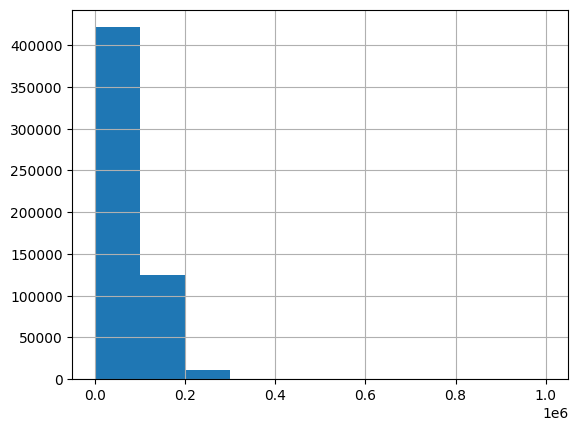

In [90]:
guadagno_odometer["odometer"].hist()

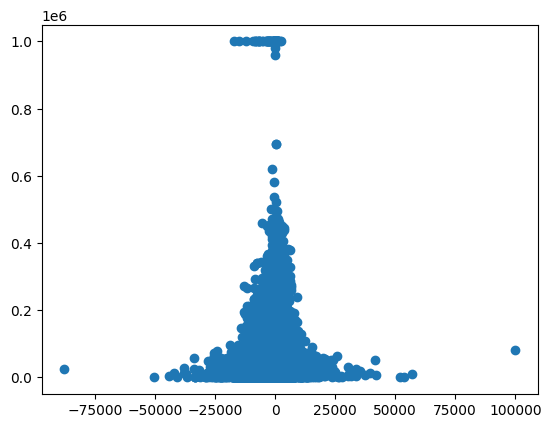

In [91]:
plt.scatter(guadagno_odometer["profitto_vendita"],guadagno_odometer["odometer"])
plt.show()

Text(0, 0.5, 'km percorsi (dal min(1) al max(999999))')

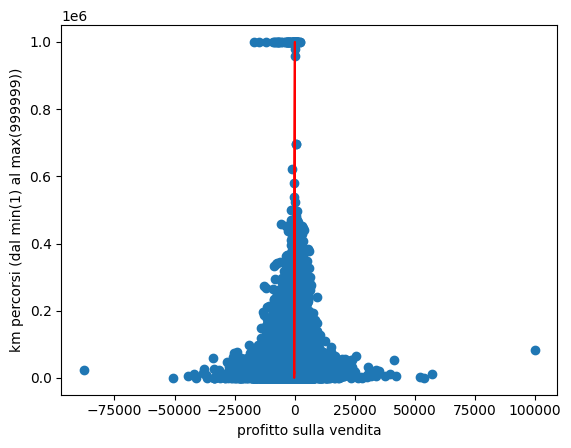

In [92]:
plt.scatter(guadagno_odometer["profitto_vendita"],guadagno_odometer["odometer"])
plt.plot(guadagno_odometer["profitto_predetto"],guadagno_odometer["odometer"], color = "red", label = "modello lineare")
plt.xlabel('profitto sulla vendita')
plt.ylabel('km percorsi (dal min(1) al max(999999))')

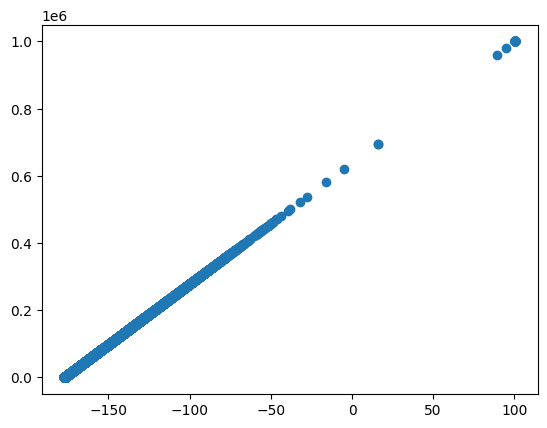

In [93]:
plt.scatter(guadagno_odometer["profitto_predetto"],guadagno_odometer["odometer"])
plt.show()

In [94]:
guadagno_odometer["flag_null"] = guadagno_odometer["odometer"].isnull()

In [95]:
guadagno_odometer["flag_null"].value_counts()

False    558641
Name: flag_null, dtype: int64

In [96]:
#SI PUO CREARE ANCHE LA VARIABILE (ETA DELLA MACCHINA) <---------------

In [97]:
#---------------------------------------------------------------------------------------------

In [98]:
db_no_dupli2

,odometer,sellingprice,mmr,condition,flag_price_null,profitto_vendita
0,16639.0,21500.0,20500.0,5.0,False,1000.0
1,9393.0,21500.0,20800.0,5.0,False,700.0
2,1331.0,30000.0,31900.0,45.0,False,-1900.0
3,14282.0,27750.0,27500.0,41.0,False,250.0
4,2641.0,67000.0,66000.0,43.0,False,1000.0
...,...,...,...,...,...,...
558832,18255.0,33000.0,35300.0,45.0,False,-2300.0
558833,54393.0,30800.0,30200.0,5.0,False,600.0
558834,50561.0,34000.0,29800.0,48.0,False,4200.0
558835,16658.0,11100.0,15100.0,38.0,False,-4000.0


In [99]:
def b(covarianza = float, varianzax = float):
    b = covarianza / varianzax
    return b

def a(mediay = float, b = float, mediax = float):
    a = mediay - (b*mediax)
    return a

In [100]:
#relazione tra profitto e condizione della macchina

In [101]:
db_no_dupli2[["profitto_vendita", "condition"]].corr()

,profitto_vendita,condition
profitto_vendita,1.000000,0.240698
condition,0.240698,1.000000


In [102]:
b1 = b(5.567859e+03, db_no_dupli2["condition"].var())
a1 = a(db_no_dupli2["profitto_vendita"].mean(),b1,db_no_dupli2["condition"].mean())
db_modello = db_no_dupli2[["profitto_vendita", "condition"]]
db_modello["predizione_guafagno"] = a1 + (db_modello["condition"] * b1)
db_modello

C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\3983331751.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_modello["predizione_guafagno"] = a1 + (db_modello["condition"] * b1)


,profitto_vendita,condition,predizione_guafagno
0,1000.0,5.0,-954.164063
1,700.0,5.0,-954.164063
2,-1900.0,45.0,285.700515
3,250.0,41.0,161.714057
4,1000.0,43.0,223.707286
...,...,...,...
558832,-2300.0,45.0,285.700515
558833,600.0,5.0,-954.164063
558834,4200.0,48.0,378.690359
558835,-4000.0,38.0,68.724214


In [103]:
db_modello["profitto_vendita"].min()

-87750.0

In [104]:
db_modello["predizione_guafagno"].min()

-1078.1505213379758

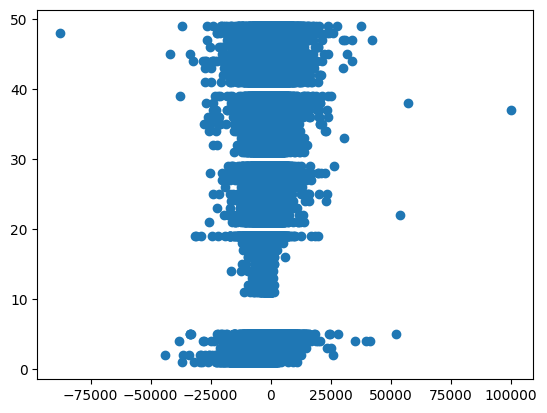

In [105]:
plt.scatter(db_modello["profitto_vendita"],db_modello["condition"])
plt.show()

Text(0, 0.5, 'condizione della macchina')

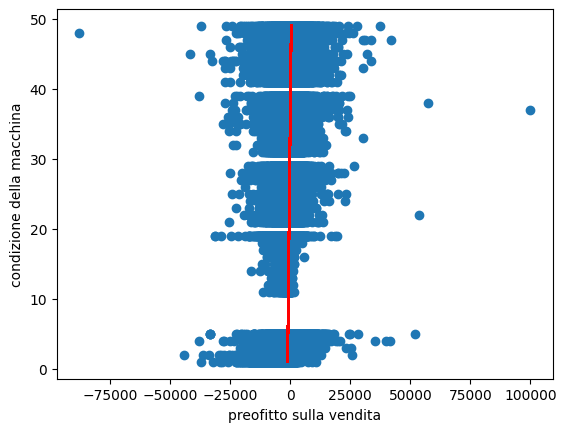

In [106]:
plt.scatter(db_modello["profitto_vendita"],db_modello["condition"])
plt.plot(db_modello["predizione_guafagno"],db_modello["condition"], color ="red", label = "modello lineare")
plt.xlabel('preofitto sulla vendita')
plt.ylabel('condizione della macchina')

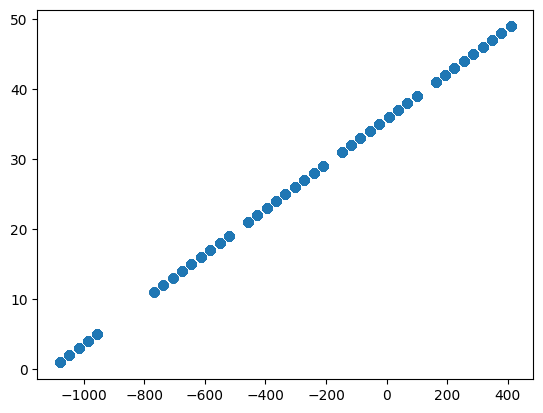

In [107]:
plt.scatter(db_modello["predizione_guafagno"],db_modello["condition"])
plt.show()

In [108]:
correlazione = 0.240698
coefficente_derivazione = (correlazione**2)*100
coefficente_derivazione 
#questo modello ha una validita del 5%

5.7935527204

In [109]:
#----------------------------------------------------------------------------------------------------

In [110]:
#APPENA TORNI FAI IL MODELLO TRA GUADAGNO (SELLINGPRICE - MMR) E ODOMETRO, DEVE VENIRE ALMENO UN COEFFICENTE DI DETERMINAZIONE DEL 25%
#POI RIPROVA A FARE IL MDOELLO DI SELLINGPRICE E ODOMETRO CHE SICURAMENTE QUALCOSA NON VA BENE
#ANCHE LE MACCHINE PIU VENDUTE (TIPO FORD) NON SAREBBE MALE

In [111]:
#--------------------------------------------------------------------------------------------------------------------
# SELLINGPRICE - ODOMETER 33%
# SELLINGPRICE - CONDITION 10%
# SELLINGPRICE - YEAR 34,4%
# SELLINGPRICE - ETA (INVERSAMENTE PROP) 34.1%
# PROFITTO - ODOMETRO 0%
# PROFITTO - CODITION 5%
# PROFITTO - ETA 0,1%
# PROFITTO - YEAR 0.1%
# 


In [112]:
db_no_dupli3 = db_no_dupli[["year","condition","odometer","mmr","sellingprice","saledate"]]

In [113]:
# db_no_dupli3=db_no_dupli3.dropna()
db_no_dupli3.reset_index()

,index,year,condition,odometer,mmr,sellingprice,saledate
0,0,2015,5.0,16639.0,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,1,2015,5.0,9393.0,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2,2014,45.0,1331.0,31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,3,2015,41.0,14282.0,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,4,2014,43.0,2641.0,66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...
558730,558832,2015,45.0,18255.0,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558731,558833,2012,5.0,54393.0,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558732,558834,2012,48.0,50561.0,29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558733,558835,2015,38.0,16658.0,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [114]:
db_no_dupli3["flag_saledate"] = db_no_dupli3["saledate"].isna()

C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\3943119337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_no_dupli3["flag_saledate"] = db_no_dupli3["saledate"].isna()


In [115]:
db_no_dupli3.loc[db_no_dupli3["flag_saledate"],:]
# db_no_dupli3.drop(306447, inplace=True)
# db_no_dupli3.reset_index()

,year,condition,odometer,mmr,sellingprice,saledate,flag_saledate
306447,2013,19.0,37254.0,NaN,NaN,NaN,True


In [116]:
db_no_dupli3.drop(306447, inplace=True)
db_no_dupli3.reset_index()

C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\4048666556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_no_dupli3.drop(306447, inplace=True)


,index,year,condition,odometer,mmr,sellingprice,saledate,flag_saledate
0,0,2015,5.0,16639.0,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),False
1,1,2015,5.0,9393.0,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),False
2,2,2014,45.0,1331.0,31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),False
3,3,2015,41.0,14282.0,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),False
4,4,2014,43.0,2641.0,66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),False
...,...,...,...,...,...,...,...,...
558729,558832,2015,45.0,18255.0,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT),False
558730,558833,2012,5.0,54393.0,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),False
558731,558834,2012,48.0,50561.0,29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),False
558732,558835,2015,38.0,16658.0,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),False


In [117]:
db_no_dupli3["year"] = db_no_dupli3["year"].astype(int)
db_no_dupli3.info()

C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\2897204980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_no_dupli3["year"] = db_no_dupli3["year"].astype(int)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 558734 entries, 0 to 558836
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   year           558734 non-null  int32  
 1   condition      546950 non-null  float64
 2   odometer       558641 non-null  object 
 3   mmr            558734 non-null  float64
 4   sellingprice   558734 non-null  object 
 5   saledate       558734 non-null  object 
 6   flag_saledate  558734 non-null  bool   
dtypes: bool(1), float64(2), int32(1), object(3)
memory usage: 28.2+ MB


In [118]:
anno_vendita1 = []
for i in db_no_dupli3["saledate"]:
    anno = i[11:15]
    anno_vendita1.append(anno)

db_no_dupli3["anno_vendita"] = anno_vendita1

C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\1085823318.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_no_dupli3["anno_vendita"] = anno_vendita1


In [119]:
db_no_dupli3["anno_vendita"] = db_no_dupli3["anno_vendita"].astype(int)
db_no_dupli3.info()

C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\3132630861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_no_dupli3["anno_vendita"] = db_no_dupli3["anno_vendita"].astype(int)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 558734 entries, 0 to 558836
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   year           558734 non-null  int32  
 1   condition      546950 non-null  float64
 2   odometer       558641 non-null  object 
 3   mmr            558734 non-null  float64
 4   sellingprice   558734 non-null  object 
 5   saledate       558734 non-null  object 
 6   flag_saledate  558734 non-null  bool   
 7   anno_vendita   558734 non-null  int32  
dtypes: bool(1), float64(2), int32(2), object(3)
memory usage: 30.4+ MB


In [120]:
db_no_dupli3["eta"] = db_no_dupli3["anno_vendita"] - db_no_dupli3["year"]

C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\3974360043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_no_dupli3["eta"] = db_no_dupli3["anno_vendita"] - db_no_dupli3["year"]


In [121]:
db_no_dupli3

,year,condition,odometer,mmr,sellingprice,saledate,flag_saledate,anno_vendita,eta
0,2015,5.0,16639.0,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),False,2014,-1
1,2015,5.0,9393.0,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),False,2014,-1
2,2014,45.0,1331.0,31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),False,2015,1
3,2015,41.0,14282.0,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),False,2015,0
4,2014,43.0,2641.0,66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),False,2014,0
...,...,...,...,...,...,...,...,...,...
558832,2015,45.0,18255.0,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT),False,2015,0
558833,2012,5.0,54393.0,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),False,2015,3
558834,2012,48.0,50561.0,29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),False,2015,3
558835,2015,38.0,16658.0,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),False,2015,0


In [122]:
db_no_dupli3[db_no_dupli3["eta"] == -1]

,year,condition,odometer,mmr,sellingprice,saledate,flag_saledate,anno_vendita,eta
0,2015,5.0,16639.0,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),False,2014,-1
1,2015,5.0,9393.0,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),False,2014,-1
5,2015,1.0,5554.0,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST),False,2014,-1
11,2015,48.0,2034.0,15150.0,17700.0,Tue Dec 16 2014 12:00:00 GMT-0800 (PST),False,2014,-1
13,2015,5.0,14634.0,20600.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),False,2014,-1
...,...,...,...,...,...,...,...,...,...
69268,2015,1.0,9399.0,14950.0,3600.0,Tue Dec 30 2014 10:45:00 GMT-0800 (PST),False,2014,-1
70513,2015,41.0,6018.0,55700.0,54600.0,Wed Dec 31 2014 11:00:00 GMT-0800 (PST),False,2014,-1
70515,2015,2.0,73.0,16050.0,6600.0,Wed Dec 31 2014 12:59:00 GMT-0800 (PST),False,2014,-1
73093,2015,5.0,3427.0,13700.0,16300.0,Wed Dec 31 2014 10:20:00 GMT-0800 (PST),False,2014,-1


In [123]:
counter = 0
for i in db_no_dupli3["eta"]:
    if i == -1: 
        db_no_dupli3["anno_vendita"][counter] = 2015
        db_no_dupli3["year"][counter] = 2014
    counter+=1
    
db_no_dupli3["eta"] = db_no_dupli3["anno_vendita"] - db_no_dupli3["year"]
        

C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\2870986786.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_no_dupli3["anno_vendita"][counter] = 2015
C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\2870986786.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_no_dupli3["year"][counter] = 2014


C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\2870986786.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_no_dupli3["eta"] = db_no_dupli3["anno_vendita"] - db_no_dupli3["year"]


In [124]:
db_no_dupli3["sellingprice"] = db_no_dupli3["sellingprice"].astype(float)
db_no_dupli3["mmr"]  = db_no_dupli3["mmr"].astype(float)

db_no_dupli3["profitto"] = db_no_dupli3["sellingprice"] - db_no_dupli3["mmr"]

C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\1633119651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_no_dupli3["sellingprice"] = db_no_dupli3["sellingprice"].astype(float)
C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\1633119651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_no_dupli3["mmr"]  = db_no_dupli3["mmr"].astype(float)
C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\1633119651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [125]:
db_no_dupli3


,year,condition,odometer,mmr,sellingprice,saledate,flag_saledate,anno_vendita,eta,profitto
0,2014,5.0,16639.0,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),False,2015,1,1000.0
1,2014,5.0,9393.0,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),False,2015,1,700.0
2,2014,45.0,1331.0,31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),False,2015,1,-1900.0
3,2015,41.0,14282.0,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),False,2015,0,250.0
4,2014,43.0,2641.0,66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),False,2014,0,1000.0
...,...,...,...,...,...,...,...,...,...,...
558832,2015,45.0,18255.0,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT),False,2015,0,-2300.0
558833,2012,5.0,54393.0,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),False,2015,3,600.0
558834,2012,48.0,50561.0,29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),False,2015,3,4200.0
558835,2015,38.0,16658.0,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),False,2015,0,-4000.0


In [126]:
db_no_dupli3[["sellingprice","eta"]].corr()

,sellingprice,eta
sellingprice,1.000000,-0.583977
eta,-0.583977,1.000000


In [127]:
db_no_dupli3[["sellingprice","year"]].corr()

,sellingprice,year
sellingprice,1.000000,0.586348
year,0.586348,1.000000


In [128]:
#--------------------------------------------------------------------------------------------------

In [129]:
#RELAZIONE TRA SELLINGPRCE E YEAR
db_no_dupli3[["sellingprice","year"]].corr()

,sellingprice,year
sellingprice,1.000000,0.586348
year,0.586348,1.000000


In [130]:
db_no_dupli3[["sellingprice","year"]].cov()

,sellingprice,year
sellingprice,9.504948e+07,22670.664108
year,2.267066e+04,15.727801


In [131]:
sellingprice_year = db_no_dupli3[["sellingprice","year"]]
b1 = b(2.267804e+04,sellingprice_year["year"].var())
a1 = a(sellingprice_year["sellingprice"].mean(),b1,sellingprice_year["year"].mean())
sellingprice_year["prezzo_predetto"] = a1 + b1*sellingprice_year["year"]
sellingprice_year

C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\3124566823.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sellingprice_year["prezzo_predetto"] = a1 + b1*sellingprice_year["year"]


,sellingprice,year,prezzo_predetto
0,21500.0,2014,19322.284145
1,21500.0,2014,19322.284145
2,30000.0,2014,19322.284145
3,27750.0,2015,20764.191991
4,67000.0,2014,19322.284145
...,...,...,...
558832,33000.0,2015,20764.191991
558833,30800.0,2012,16438.468452
558834,34000.0,2012,16438.468452
558835,11100.0,2015,20764.191991


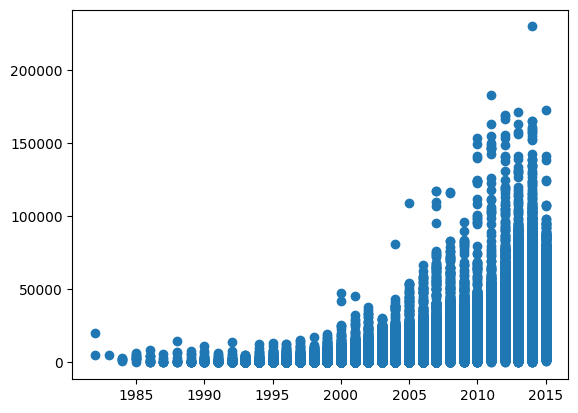

In [132]:
plt.scatter(sellingprice_year["year"],sellingprice_year["sellingprice"])
plt.show()

Text(0, 0.5, 'prezzo macchina')

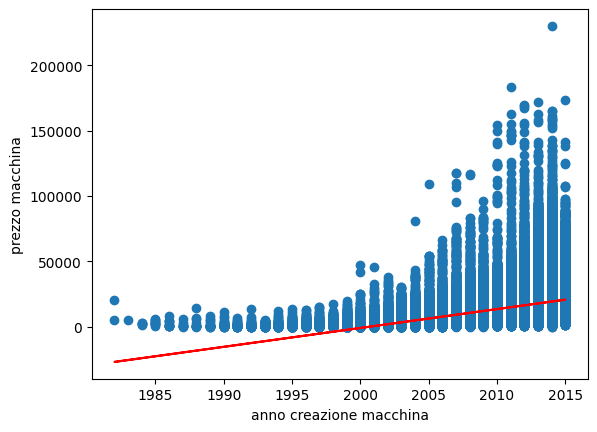

In [133]:
plt.scatter(sellingprice_year["year"],sellingprice_year["sellingprice"])
plt.plot(sellingprice_year["year"],sellingprice_year["prezzo_predetto"],color="red",label='Modello lineare')
plt.xlabel('anno creazione macchina')
plt.ylabel('prezzo macchina')

In [134]:
coeff_determinazione = 	(0.586443 **2) * 100
coeff_determinazione
#qQUESTO MODELLO HA UNA VALIDITA DEL 34,4%

34.3915392249

In [135]:
#-----------------------------------------------------------------------------------------

In [136]:
#CORRELAZIONE TRA SELLINGPRICE - ETA
db_no_dupli3[["sellingprice","eta"]].corr()
#è inversamente proporzionale, all'aumentare dell'età scende il sellingprice

,sellingprice,eta
sellingprice,1.000000,-0.583977
eta,-0.583977,1.000000


In [137]:
db_no_dupli3[["sellingprice","eta"]].cov()

,sellingprice,eta
sellingprice,9.504948e+07,-22448.017216
eta,-2.244802e+04,15.545835


In [138]:
sellingprice_eta = db_no_dupli3[["sellingprice","eta"]]
b1 = b(-2.244802e+04,db_no_dupli3["eta"].var())
a1 = a(db_no_dupli3["sellingprice"].mean(), b1, db_no_dupli3["eta"].mean())
sellingprice_eta["prezzo_predetto"] = a1+ b1*sellingprice_eta["eta"]
sellingprice_eta
b1

C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\2818767714.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sellingprice_eta["prezzo_predetto"] = a1+ b1*sellingprice_eta["eta"]


-1443.9893270914351

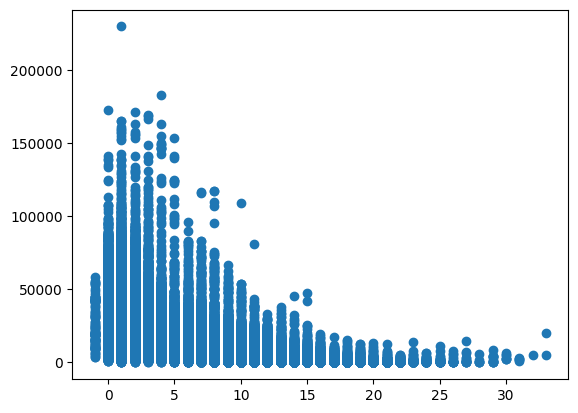

In [139]:
plt.scatter(sellingprice_eta["eta"],sellingprice_eta["sellingprice"])
plt.show()

Text(0, 0.5, 'prezzo di vendita')

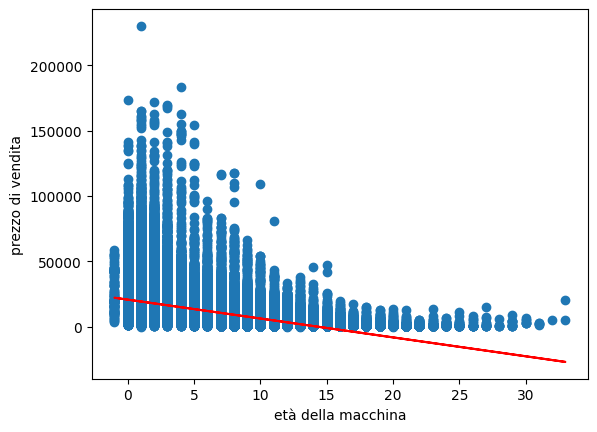

In [140]:
plt.scatter(sellingprice_eta["eta"],sellingprice_eta["sellingprice"])
plt.plot(sellingprice_eta["eta"], sellingprice_eta["prezzo_predetto"],color = "red", label='Modello lineare')
plt.xlabel('età della macchina')
plt.ylabel('prezzo di vendita')

In [141]:
coeff_determinazione = ((-0.583977)**2)*100
coeff_determinazione

34.1029136529

In [142]:
#------------------------------------------------------------------------------------------------------------------------

In [143]:
#relazione tra profitto ed eta
profitto_eta = db_no_dupli3[["profitto","eta"]]
profitto_eta.corr()

,profitto,eta
profitto,1.000000,0.034392
eta,0.034392,1.000000


In [144]:
profitto_eta.cov()

,profitto,eta
profitto,3.093652e+06,238.508783
eta,2.385088e+02,15.545835


In [145]:
b1 = b(2.385088e+02,db_no_dupli3["eta"].var())
a1 = a(db_no_dupli3["profitto"].mean(),b1,db_no_dupli3["eta"].mean())
profitto_eta["profitto_predetto"] = a1 + b1*db_no_dupli3["eta"]
profitto_eta

C:\Users\lucam\AppData\Local\Temp\ipykernel_21304\3642416631.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitto_eta["profitto_predetto"] = a1 + b1*db_no_dupli3["eta"]


,profitto,eta,profitto_predetto
0,1000.0,1,-217.282853
1,700.0,1,-217.282853
2,-1900.0,1,-217.282853
3,250.0,0,-232.625149
4,1000.0,0,-232.625149
...,...,...,...
558832,-2300.0,0,-232.625149
558833,600.0,3,-186.598262
558834,4200.0,3,-186.598262
558835,-4000.0,0,-232.625149


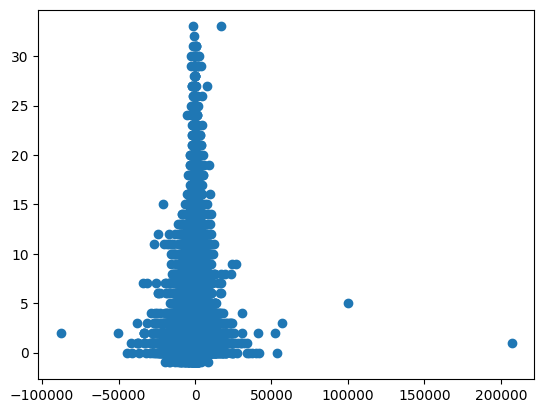

In [146]:
plt.scatter(profitto_eta["profitto"],profitto_eta["eta"])
plt.show()

In [147]:
plt.scatter(profitto_eta["profitto"],profitto_eta["eta"])
plt.plot(profitto_eta["profitto_predetto"],profitto_eta["eta"], color = "red", label ="Modello lineare")
plt.xlabel('profitto')
plt.ylabel('età della macchina')

Text(0, 0.5, 'età della macchina')

In [ ]:
#VALIDITA 0,1%

In [ ]:
#-----------------------------------------------------------------------------------------

In [ ]:
#CORRELAIZONE TRA PROFITTO - YEAR
profitto_year = db_no_dupli3[["profitto","year"]]
profitto_year.corr()

,profitto,year
profitto,1.000000,-0.032482
year,-0.032482,1.000000


In [ ]:
profitto_year.cov()

,profitto,year
profitto,3.093652e+06,-226.576599
year,-2.265766e+02,15.727801


In [ ]:
b1 = b(2.385088e+02,db_no_dupli3["year"].var())
a1 = a(db_no_dupli3["profitto"].mean(),b1,db_no_dupli3["year"].mean())
profitto_year["profitto_predetto"] = a1 + b1*db_no_dupli3["year"]
profitto_year

C:\Users\lucam\AppData\Local\Temp\ipykernel_27580\4193738086.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitto_year["profitto_predetto"] = a1 + b1*db_no_dupli3["year"]


,profitto,year,profitto_predetto
0,1000.0,2014,-97.941686
1,700.0,2014,-97.941686
2,-1900.0,2014,-97.941686
3,250.0,2015,-82.776896
4,1000.0,2014,-97.941686
...,...,...,...
558832,-2300.0,2015,-82.776896
558833,600.0,2012,-128.271265
558834,4200.0,2012,-128.271265
558835,-4000.0,2015,-82.776896


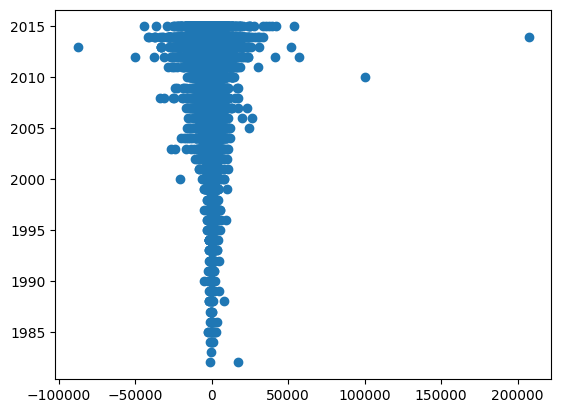

In [ ]:
plt.scatter(profitto_year["profitto"],profitto_year["year"])
plt.show()

Text(0, 0.5, 'anno creazione della macchina')

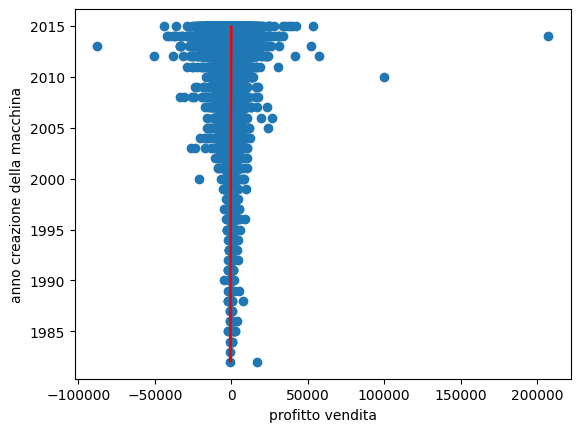

In [ ]:
plt.scatter(profitto_year["profitto"],profitto_year["year"])
plt.plot(profitto_year["profitto_predetto"],profitto_year["year"], color = "red", label = "Modello lineare")
plt.xlabel('profitto vendita')
plt.ylabel('anno creazione della macchina')

In [ ]:
coefficente_determinazione = ((-0.032482)**2)*100
coefficente_determinazione

0.10550803239999997

In [ ]:
#---------------------------------------------------------------------------------------------------

In [ ]:
#CONTROLLARE LA MARCA DI AUTO CHE è STATA PIU VENDUTA

In [ ]:
db_no_dupli
make_cu = db_no_dupli[["make", "chiave_univoca"]]

In [ ]:
pivot = pd.pivot_table(
    make_cu,
    index = "make",
    aggfunc = "count",
    values = "chiave_univoca"
    )
pivot = pivot.fillna(0).round(2).sort_values(by="chiave_univoca", ascending=False)
pivot

,chiave_univoca
make,
Ford,93543
Chevrolet,60185
Nissan,53936
Toyota,39865
Dodge,30701
...,...
chev truck,1
ford tk,1
airstream,1


Text(0, 0.5, 'unità vendute')

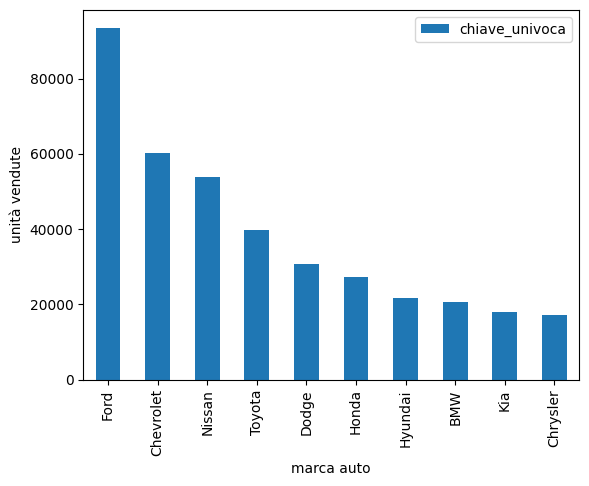

In [ ]:
grafico_pivot = pivot.head(10)
grafico_pivot.plot(kind="bar")
plt.xlabel('marca auto')
plt.ylabel('unità vendute')

In [ ]:
#--------------------------------------------------------------------------------------------------

In [ ]:
#CONTROLLARE LA MARCA DI AUTO PIU COSTOSA

In [ ]:
make_sellingprice = db_no_dupli[["make", "sellingprice","chiave_univoca"]].dropna()
make_sellingprice["sellingprice"] = make_sellingprice["sellingprice"].astype(float)

In [ ]:
pivot2 = pd.pivot_table(
    make_sellingprice,
    index = "make",
    aggfunc = {"sellingprice":"mean", "chiave_univoca":"count"},
    values = ["sellingprice", "chiave_univoca"],
    )
pivot2 = pivot2.fillna(0).round(2).sort_values(by="sellingprice", ascending=False)
pivot2

,chiave_univoca,sellingprice
make,,
Rolls-Royce,17,153488.24
Ferrari,19,127210.53
Lamborghini,4,112625.00
Bentley,116,74367.67
airstream,1,71000.00
...,...,...
dodge tk,1,550.00
Geo,19,528.95
dot,1,500.00


Text(0, 0.5, 'media prezzo')

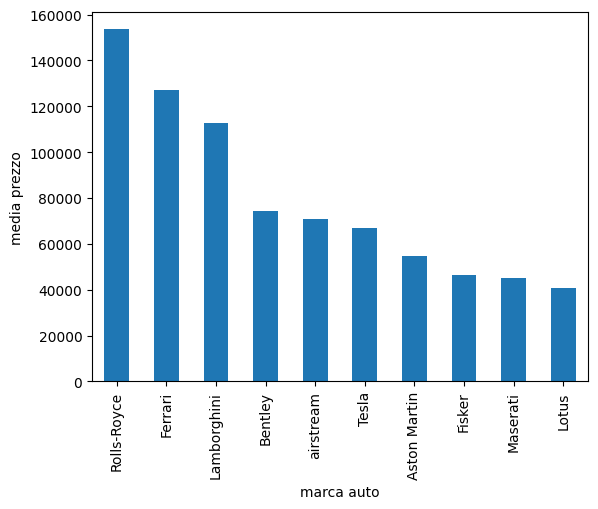

In [ ]:
grafico_pivot2 = pivot2.head(10)
grafico_pivot2["sellingprice"].plot(kind="bar")
plt.xlabel('marca auto')
plt.ylabel('media prezzo')

Text(0, 0.5, 'unità vendute')

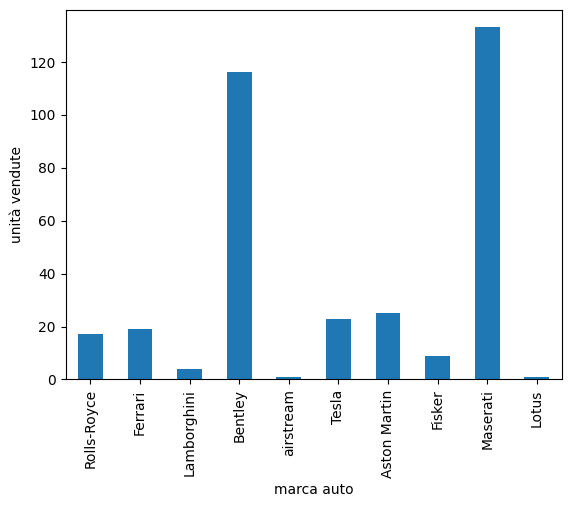

In [ ]:
grafico_pivot2 = pivot2.head(10)
grafico_pivot2["chiave_univoca"].plot(kind="bar")
plt.xlabel('marca auto')
plt.ylabel('unità vendute')

In [ ]:
#NOTA PER IL FUTURO <---- CHIEDERE AL PROF COME SI FANNO GLI ISTOGRAMMI SU PYTHON 

In [ ]:
#-------------------------------------------------------------------------------------------

In [ ]:
#CONTROLLARE L'ANNO CON PIU VENDITE

In [ ]:
year_cu = db_no_dupli[["year","chiave_univoca"]].dropna()
year_cu
pivot3 = pd.pivot_table(
    year_cu,
    index = "year",
    aggfunc = "count",
    values = "chiave_univoca",
    )
pivot3 = pivot3.fillna(0).round(2).sort_values(by="chiave_univoca", ascending=False)
pivot3

,chiave_univoca
year,
2012,102301
2013,98156
2014,81066
2011,48545
2008,31497
2007,30838
2006,26908
2010,26480
2005,21384


Text(0, 0.5, 'unità vendute')

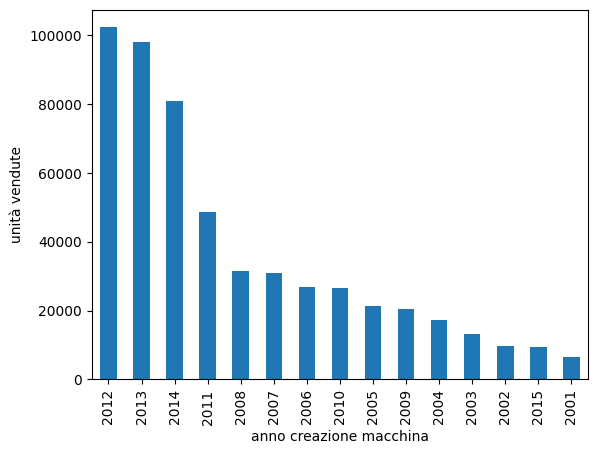

In [ ]:
grafico_pivot3 = pivot3.head(15)
grafico_pivot3["chiave_univoca"].plot(kind="bar")
plt.xlabel('anno creazione macchina')
plt.ylabel('unità vendute')

In [ ]:
#------------------------------------------------------------------------------------------------

In [ ]:
#STATO CHE HA VENDUTO PIU MACCHINA

In [ ]:
state_cu = db_no_dupli[["state","chiave_univoca"]].dropna()
state_cu
pivot6 = pd.pivot_table(
    state_cu,
    index = "state",
    aggfunc = "count",
    values = "chiave_univoca",
    )
pivot6 = pivot6.fillna(0).round(2).sort_values(by="chiave_univoca", ascending=False)
pivot6

,chiave_univoca
state,
fl,82941
ca,73135
pa,53899
tx,45905
ga,34746
nj,27781
il,23472
nc,21840
oh,21567


Text(0, 0.5, 'unità vendute')

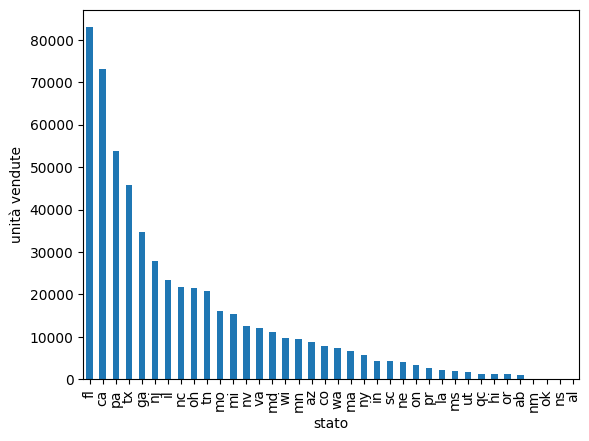

In [ ]:
grafico_pivot6 = pivot6
grafico_pivot6["chiave_univoca"].plot(kind="bar")
plt.xlabel('stato')
plt.ylabel('unità vendute')

In [ ]:
#---------------------------------------------------------------------------------------------------

In [ ]:
#STATO CON LE MACCHINA PIU COSTOSE

In [ ]:
state_sellingprice = db_no_dupli[["state","sellingprice"]].dropna()
state_sellingprice["sellingprice"] = state_sellingprice["sellingprice"].astype(float)
state_sellingprice
pivot7 = pd.pivot_table(
    state_sellingprice,
    index = "state",
    aggfunc = "mean",
    values = "sellingprice",
    )
pivot7 = pivot7.fillna(0).round(2).sort_values(by="sellingprice", ascending=False)
pivot7

,sellingprice
state,
on,17812.62
tn,17010.84
pa,15976.81
co,15878.27
nv,15102.64
mi,14887.02
il,14795.41
ca,14506.41
mo,14465.27


Text(0, 0.5, 'media costo macchine')

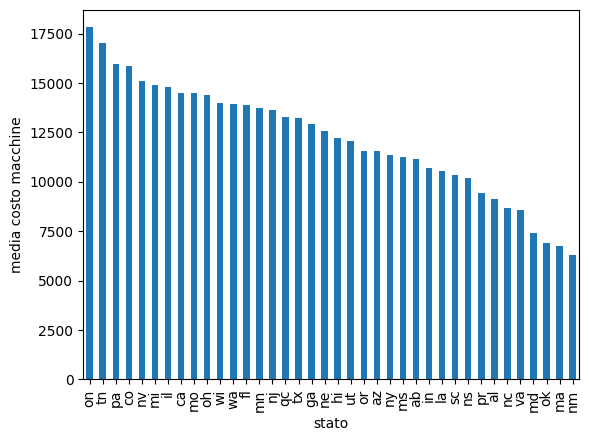

In [ ]:
grafico_pivot7 = pivot7
grafico_pivot7["sellingprice"].plot(kind="bar")
plt.xlabel('stato')
plt.ylabel('media costo macchine')

In [ ]:
#---------------------------------------------------------------------------------------------------

In [ ]:
#CONTROLARE IL COLORE PIU COSTOSO

In [ ]:
color_cu = db_no_dupli[["color","chiave_univoca"]].dropna().reset_index()

counter = 0
for i in color_cu["color"]:
    if color_cu["color"][counter] == "—":
        color_cu["color"][counter] = np.nan
    counter += 1

pivot4 = pd.pivot_table(
    color_cu,
    index = "color",
    aggfunc = "count",
    values = "chiave_univoca",
    )
pivot4 = pivot4.fillna(0).round(2).sort_values(by="chiave_univoca", ascending=False)
pivot4

C:\Users\lucam\AppData\Local\Temp\ipykernel_27580\4024344905.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  color_cu["color"][counter] = np.nan


,chiave_univoca
color,
black,110958
white,106654
silver,83376
gray,82845
blue,51136
red,43562
green,11381
gold,11341
beige,9221


Text(0, 0.5, 'unità vendute')

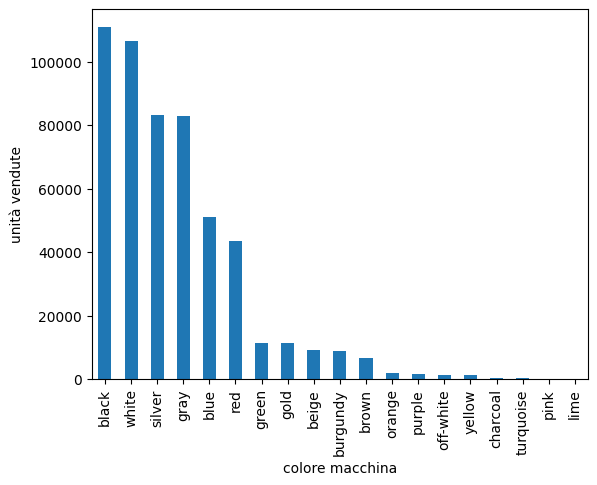

In [ ]:
grafico_pivot4 = pivot4
grafico_pivot4["chiave_univoca"].plot(kind="bar")
plt.xlabel('colore macchina')
plt.ylabel('unità vendute')

In [ ]:
#-------------------------------------------------------------------------------------------------

In [ ]:
#CONTROLLARE IL COLORE PIU VENDUTO

In [ ]:
color_sellingprice = db_no_dupli[["color","sellingprice"]].dropna().reset_index()
color_sellingprice["sellingprice"] = color_sellingprice["sellingprice"].astype(float)

counter = 0
for i in color_sellingprice["color"]:
    if color_sellingprice["color"][counter] == "—":
        color_sellingprice["color"][counter] = np.nan
    counter += 1
        
pivot5 = pd.pivot_table(
    color_sellingprice,
    index = "color",
    aggfunc = "mean",
    values = "sellingprice",
    )
pivot5 = pivot5.fillna(0).round(2).sort_values(by="sellingprice", ascending=False)
pivot5

C:\Users\lucam\AppData\Local\Temp\ipykernel_27580\4161412329.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  color_sellingprice["color"][counter] = np.nan


,sellingprice
color,
charcoal,16247.50
black,15509.77
brown,15352.81
off-white,15230.23
white,14742.02
gray,13951.54
lime,13256.67
orange,12787.11
red,12690.34


In [ ]:
for i in color_sellingprice["color"]:
    if i == "—":
        print("a")

Text(0, 0.5, 'prezzo macchina')

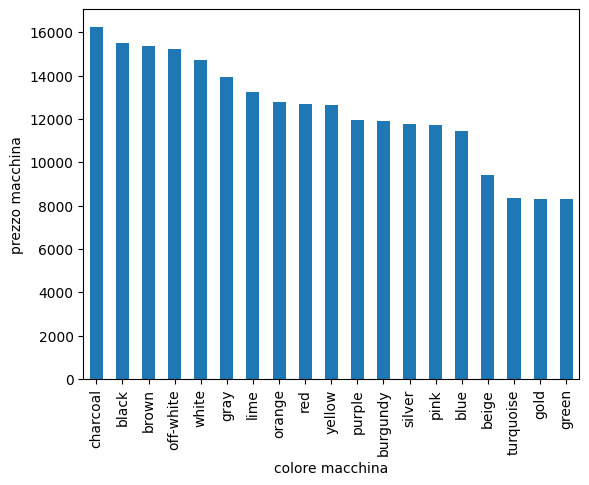

In [ ]:
grafico_pivot5 = pivot5
grafico_pivot5["sellingprice"].plot(kind="bar")
plt.xlabel('colore macchina')
plt.ylabel('prezzo macchina')

In [ ]:
#-------------------------------------------------------------------------------------------------

In [ ]:
#ANNO CHE HA VENDUTO LE MACCHINE PIU COSTOSE

In [ ]:
year_sellingprice = db_no_dupli[["year","sellingprice"]].dropna()
year_sellingprice["sellingprice"] = year_sellingprice["sellingprice"].astype(float)
pivot9 = pd.pivot_table(
    year_sellingprice,
    index = "year",
    aggfunc = "mean",
    values = "sellingprice",
    )
pivot9 = pivot9.fillna(0).round(2).sort_values(by="sellingprice", ascending=False)
pivot9

,sellingprice
year,
2015,25934.22
2014,20090.17
2013,17476.59
2012,16653.60
2011,15851.33
1982,12750.00
2010,12413.21
2009,10462.00
2008,9507.14


Text(0, 0.5, 'prezzo macchina')

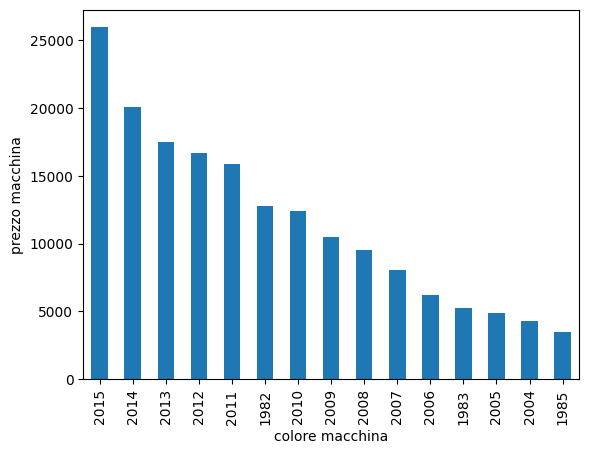

In [ ]:
grafico_pivot9 = pivot9.head(15)
grafico_pivot9["sellingprice"].plot(kind="bar")
plt.xlabel('colore macchina')
plt.ylabel('prezzo macchina')

In [ ]:
#------------------------------------------------------------------------------------------

In [ ]:
#ANNO CON IL FATTURATO PIU ALTO

In [ ]:
year_sellingprice = db_no_dupli[["year","sellingprice"]].dropna()
year_sellingprice["sellingprice"] = year_sellingprice["sellingprice"].astype(float)
pivot10 = pd.pivot_table(
    year_sellingprice,
    index = "year",
    aggfunc = "sum",
    values = "sellingprice",
    )
pivot10 = pivot10.fillna(0).round(0).sort_values(by="sellingprice", ascending=False)
pivot10

,sellingprice
year,
2013,1.715432e+09
2012,1.703680e+09
2014,1.628630e+09
2011,7.695026e+08
2010,3.287018e+08
2008,2.994464e+08
2007,2.473990e+08
2015,2.446375e+08
2009,2.154335e+08


Text(0, 0.5, 'fatturato')

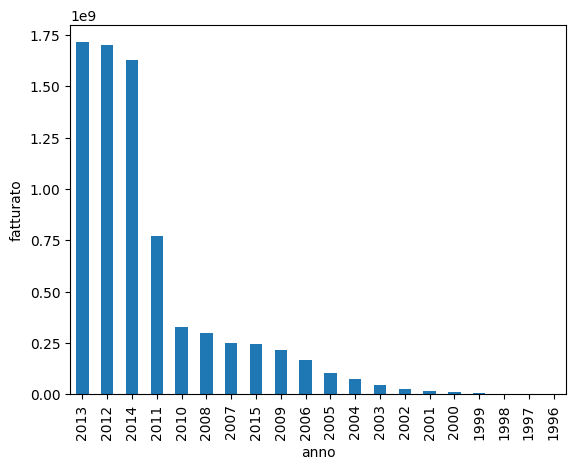

In [ ]:
grafico_pivot10 = pivot10.head(20)
grafico_pivot10["sellingprice"].plot(kind="bar")
plt.xlabel('anno')
plt.ylabel('fatturato')